<a href="https://colab.research.google.com/github/manish55shukla/Online-Travel-Agency/blob/main/Online%20Travel%20Agency(OTA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains booking data from an OTA (Online Travel Agency).
buyer_id represents unique customers.
supplier_id represents unique suppliers from whom flights were purchased for resale.
Other fields in the dataset are self-explanatory.

Task :
1. Identify 3 short-term or long-term data observations.
2. Analyze the possible causes behind these observations.
3. Suggest strategies to improve sales and profitability.

Expected Deliverables:


*   Python code used for the analysis along with data visualizations.
*   A PowerPoint presentation highlighting the key findings.



In [1]:
#Importing all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Reading file

df_OTA = pd.read_csv('/content/drive/MyDrive/Travclan/python_test_dataset_flights_6months.csv')


In [4]:
# Display first few rows and columns

df_OTA.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,2024-03-01,PayPal,Yes,369.648995,Web,confirmed,04-03-2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,2024-03-01,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,2024-03-01,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,2024-03-01,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,2024-03-01,Debit Card,Yes,727.341978,Web,confirmed,11-09-2023,0.000000,0.000000,No


In [5]:
# Print information about the DataFrame
df_OTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            32240 non-null  int64  
 1   supplier_id         32240 non-null  int64  
 2   to_airport          32240 non-null  object 
 3   from_airport        32240 non-null  object 
 4   journey_type        32240 non-null  object 
 5   pax                 32240 non-null  int64  
 6   costprice           32240 non-null  float64
 7   markup              32240 non-null  float64
 8   selling_price       32240 non-null  float64
 9   booking_date        32240 non-null  object 
 10  payment_method      32240 non-null  object 
 11  refund_status       32240 non-null  object 
 12  refund_amount       32240 non-null  float64
 13  channel_of_booking  32240 non-null  object 
 14  booking_status      32240 non-null  object 
 15  travel_date         32240 non-null  object 
 16  cash

In [6]:
# Dataset Rows & Columns count
rows = len(df_OTA.index)
print("Rows :", rows)
columns = len(df_OTA.columns)
print("Columns: ",columns)

Rows : 32240
Columns:  19


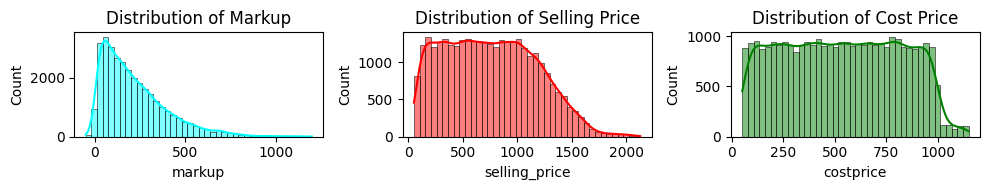

In [7]:



# Plot of  markup, selling price, and cost price
plt.figure(figsize=(10, 2))


# Distribution of Markup
plt.subplot(1, 3, 1)
sns.histplot(df_OTA['markup'], kde=True, bins=40, color='Cyan')
plt.title('Distribution of Markup')

# Distribution of Selling Price
plt.subplot(1, 3, 2)
sns.histplot(df_OTA['selling_price'], kde=True, bins=40, color='red')
plt.title('Distribution of Selling Price')


# Distribution of Cost Price
plt.subplot(1, 3, 3)
sns.histplot(df_OTA['costprice'], kde=True, bins=40, color='green')
plt.title('Distribution of Cost Price')

plt.tight_layout()
plt.show()

# Sales and refunds

In [8]:
# booking month and travel month data
df_OTA['travel_date'] = pd.to_datetime(df_OTA['travel_date'], errors='coerce')
df_OTA['travel_month'] = df_OTA['travel_date'].dt.to_period('M')

df_OTA['booking_date'] = pd.to_datetime(df_OTA['booking_date'], errors='coerce')
df_OTA['booking_month'] = df_OTA['booking_date'].dt.to_period('M')

df_OTA[['travel_date', 'travel_month']].head()

,travel_date,travel_month
0,2024-04-03,2024-04
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,2023-11-09,2023-11


In [9]:
# Aggregate of sales and refund by months

monthly_sales = df_OTA.groupby('booking_month')['selling_price'].sum()
monthly_refunds = df_OTA.groupby('booking_month')['refund_amount'].sum()


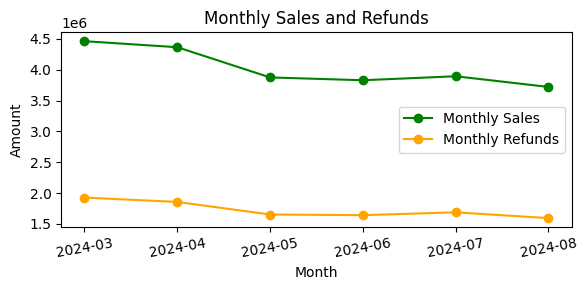

In [10]:
# Plot Monthly Sales vs Refunds
plt.figure(figsize=(6, 3))
plt.plot(monthly_sales.index.astype(str), monthly_sales, label='Monthly Sales', color='Green', marker='o')
plt.plot(monthly_refunds.index.astype(str), monthly_refunds, label='Monthly Refunds', color='Orange', marker='o')

plt.xticks(rotation=10)
plt.title('Monthly Sales and Refunds')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Count the number of payment mathods used and their booking channels


payment_method_counts = df_OTA['payment_method'].value_counts()
channel_counts = df_OTA['channel_of_booking'].value_counts()

print(payment_method_counts, channel_counts)

payment_method
PayPal           8113
Credit Card      8098
Bank Transfer    8026
Debit Card       8003
Name: count, dtype: int64 channel_of_booking
Web        16120
Android     9672
iOS         6448
Name: count, dtype: int64


<ipython-input-12-3c451a6ad7e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Spectral')
<ipython-input-12-3c451a6ad7e0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='inferno')


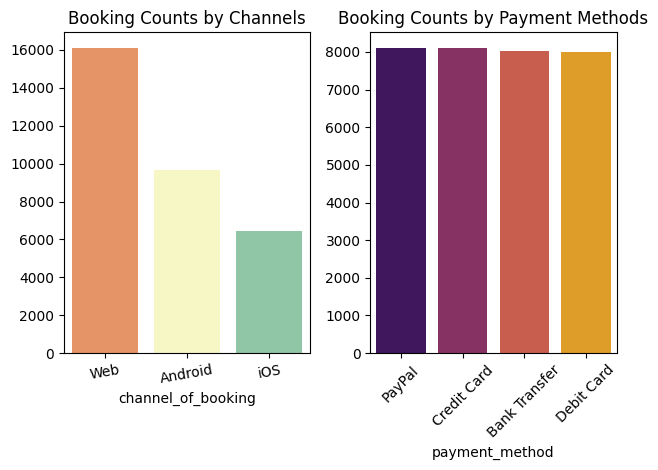

In [12]:
# Visualiation of channel count and booking count

# Booking Counts by Channel
plt.subplot(1, 2, 1)
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Spectral')
plt.title('Booking Counts by Channels')
plt.xticks(rotation=10)

plt.subplot(1, 2, 2)
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='inferno')
plt.title('Booking Counts by Payment Methods')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [13]:
#Correlation between markup, cost price and profit.

df_OTA['profit'] = df_OTA['selling_price'] - df_OTA['costprice']
correlation = df_OTA[['markup', 'costprice', 'profit']].corr()

correlation

,markup,costprice,profit
markup,1.000000,0.658168,0.951291
costprice,0.658168,1.000000,0.693888
profit,0.951291,0.693888,1.000000


In [14]:
# Refund Statistics

refund_stats = df_OTA['refund_amount'].describe()

# average_refund = refund_stats['mean'] //ANOTHER WAY TO CALCULATE AVERAGE
print(refund_stats)


count    32240.000000
mean       321.169098
std        339.865111
min          0.000000
25%          0.000000
50%        221.482908
75%        593.005610
max       1462.725105
Name: refund_amount, dtype: float64


In [15]:
# Selling Price Statistics

selling_stats = df_OTA['selling_price'].describe()

print(selling_stats)


count    32240.000000
mean       749.185111
std        414.305052
min         50.766206
25%        399.945463
50%        729.318731
75%       1062.007949
max       2126.801346
Name: selling_price, dtype: float64


In [16]:
# Cost Price Statistics

cost_stats = df_OTA['costprice'].describe()

print(cost_stats)


count    32240.000000
mean       534.454208
std        280.406808
min         50.005653
25%        292.391617
50%        533.950333
75%        773.706987
max       1150.283064
Name: costprice, dtype: float64


In [17]:
# Stats of cashbacks:
    # cashback

cashback_stats = df_OTA['cashback'].describe()
print(cashback_stats)


count    32240.000000
mean         1.800790
std          3.790310
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.268013
Name: cashback, dtype: float64


In [18]:
# Stats of cashbacks:
    # Coupons used

Coupon_used_stats = df_OTA['Coupon USed?'].describe()
print(Coupon_used_stats)

count     32240
unique        2
top          No
freq      20871
Name: Coupon USed?, dtype: object


In [19]:
# Stats of cashbacks:
    # coupon_redeem

coupon_redeem_stats = df_OTA['coupon_redeem'].describe()
print(coupon_redeem_stats)

count    32240.000000
mean         7.230413
std         13.746741
min         -5.147875
25%          0.000000
50%          0.000000
75%          8.969851
max         91.593305
Name: coupon_redeem, dtype: float64


# **Observations**:

###For refund -

> The average is 321.16 and it's fluctuating. The maximum refund is 1462. Which means there is a high refund issues.

###For coupons -

> It seems most of the booking don't use coupons which we can examine by checking the median viz 0.

###Trend of sales and refund

> We can see the sales and refund graphs are moving parallelly. That said, the sales are increasing but along with this refund stats is also increasing - Which will somehow impact the profit margin.  


###Profit Consistency Across Channels:

> Profitability is same across booking platforms, means it's a balanced user distribution.









###Possible Causes:


###Supplier Issues:


> The high refund rate is likely related to specific suppliers. This can be a frequent cancellations or suboptimal service.



###ute Saturation:


>  Popular routes may experience volatility due to frequent cancellations or shifts in demand(high or low).




###Promotions and Refund Policies:


> Refunds could also be linked to cancellation or refund policies, incentivizing cancellations.







###Strategies to improve sales and profitability


###Supplier Evaluation:
 Work closely with suppliers that have high refund rates to identify operational inefficiencies and reduce the cancellation.
###Optimize Refund Policies:
Tighten refund policies or provide incentives (such as additional coupons  or discounts) for customers to rebook rather than cancel.
###Targeted Marketing:
Focus marketing campaigns on the most profitable routes and booking channels to maximize the returns.
